In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trip = pd.read_csv('data/trip.csv')
weather = pd.read_csv('data/weather.csv')

In [3]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [4]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [3]:
# Drop time from trips
trip.loc[:,'start_date'] = trip.loc[:,'start_date'].map(lambda s: s.split(' ')[0])
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [6]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [7]:
trip.zip_code.unique()

array(['94127', '95138', '97214', ..., '2400105', '1004004', '29609'], dtype=object)

Que onda? Los codigos postales no coinciden. Como obtengo el clima para cada viaje?

In [29]:
# COUNT NULLS
tmp = weather.drop('zip_code', axis=1).apply(lambda x: x.isnull())
tmp['zip_code'] = weather.zip_code
tmp.groupby('zip_code').sum()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
zip_code,,,,,,,,,,,,,,,,,,,,,
94041,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,639.0,0.0
94063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,412.0,0.0,0.0,639.0,0.0
94107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,574.0,0.0
94301,0.0,1.0,1.0,1.0,51.0,51.0,51.0,51.0,51.0,51.0,...,13.0,13.0,13.0,1.0,1.0,453.0,1.0,1.0,653.0,1.0
95113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,638.0,0.0


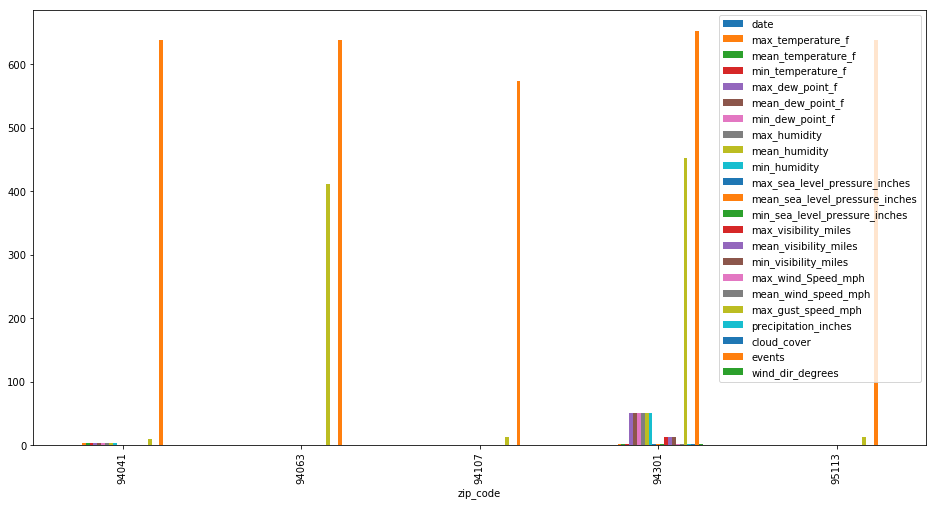

In [63]:
tmp.groupby('zip_code').sum().plot(kind='bar', figsize=(16,8))

Zip code 94107 has fewest nulls

In [4]:
curated_weather = weather[weather.zip_code == 94107]
del curated_weather['zip_code']
curated_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0


In [5]:
tmp = trip.merge(curated_weather, how='outer', left_on='start_date', right_on='date')
tmp.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
0,4576,63,8/29/2013,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
1,4607,70,8/29/2013,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
2,4130,71,8/29/2013,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
3,4251,77,8/29/2013,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0
4,4299,83,8/29/2013,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,...,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0


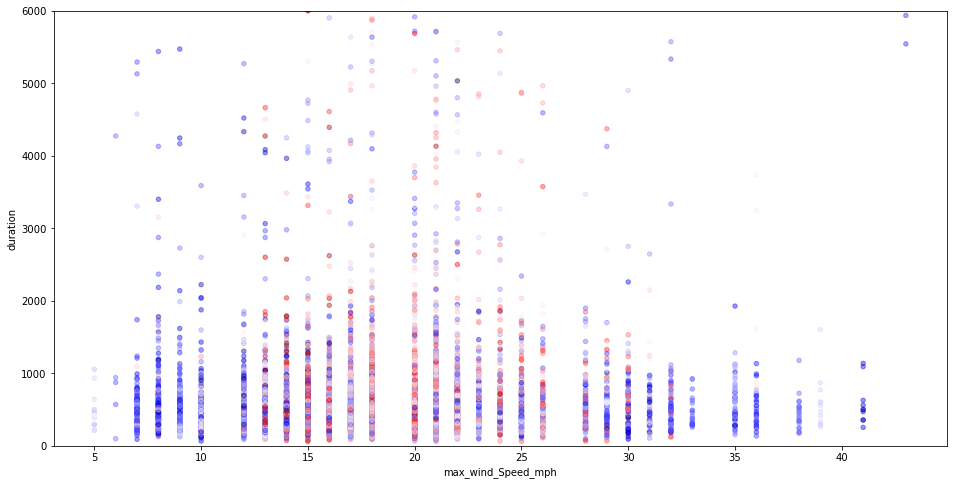

In [17]:
tmp.sample(10000).plot.scatter(x='max_wind_Speed_mph', y='duration',\
                c='max_temperature_f', colormap='seismic', alpha=0.4,\
                figsize=(16,8), colorbar=False, ylim=[0,6000])

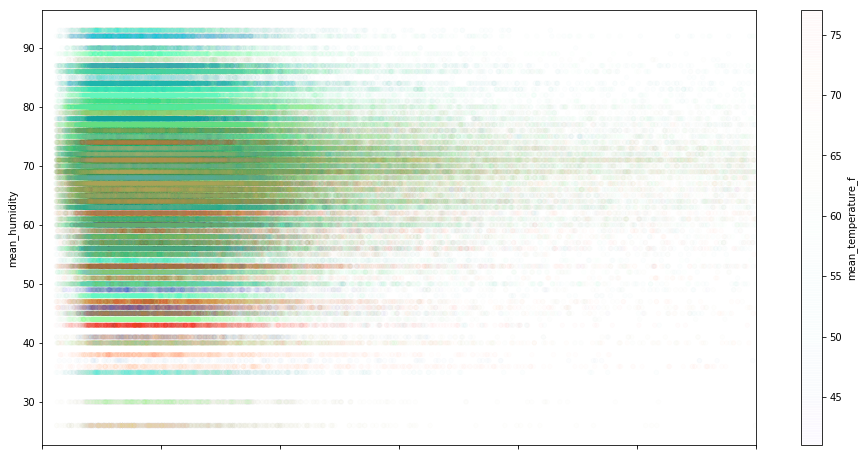

In [44]:
tmp.plot.scatter(x='duration', y='mean_humidity',\
                c='mean_temperature_f', colormap='rainbow', alpha=0.01,\
                figsize=(16,8), colorbar=True, xlim=(0,3000))

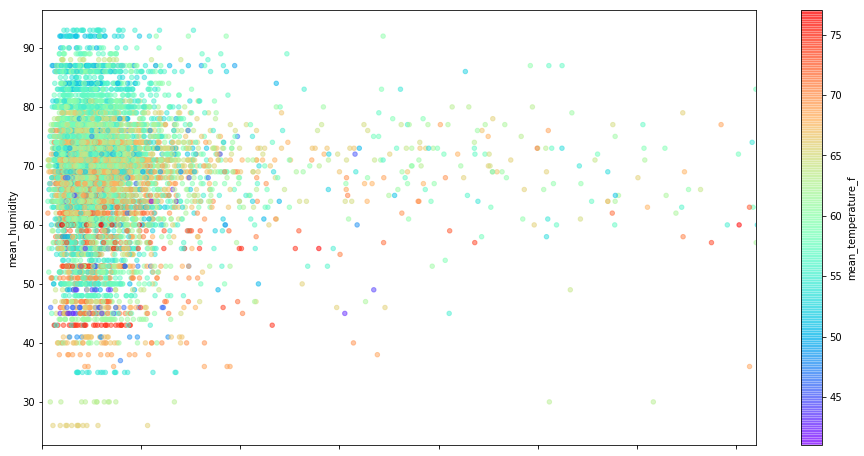

In [6]:
tmp.sample(10000).plot.scatter(x='duration', y='mean_humidity',\
                c='mean_temperature_f', colormap='rainbow', alpha=0.5,\
                figsize=(16,8), colorbar=True, xlim=(0,7200))

In [20]:
tmp.columns

Index([u'id', u'duration', u'start_date', u'start_station_name',
       u'start_station_id', u'end_date', u'end_station_name',
       u'end_station_id', u'bike_id', u'subscription_type', u'zip_code',
       u'date', u'max_temperature_f', u'mean_temperature_f',
       u'min_temperature_f', u'max_dew_point_f', u'mean_dew_point_f',
       u'min_dew_point_f', u'max_humidity', u'mean_humidity', u'min_humidity',
       u'max_sea_level_pressure_inches', u'mean_sea_level_pressure_inches',
       u'min_sea_level_pressure_inches', u'max_visibility_miles',
       u'mean_visibility_miles', u'min_visibility_miles',
       u'max_wind_Speed_mph', u'mean_wind_speed_mph', u'max_gust_speed_mph',
       u'precipitation_inches', u'cloud_cover', u'events',
       u'wind_dir_degrees'],
      dtype='object')

In [27]:
tmp.duration.describe()

count    6.699590e+05
mean     1.107950e+03
std      2.225544e+04
min      6.000000e+01
25%      3.440000e+02
50%      5.170000e+02
75%      7.550000e+02
max      1.727040e+07
Name: duration, dtype: float64

In [39]:
plt.colormaps()

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Vega10',
 u'Vega10_r',
 u'Vega20',
 u'Vega20_r',
 u'Vega20b',
 u'Vega20b_r',
 u'Vega20c',
 u'Vega20c_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_